# Chapter 9 - Support Vector Machines

Here we approach the two-class classification problem in a
direct way:
We try and find a plane that separates the classes in
feature space.
If we cannot, we get creative in two ways:
- We soften what we mean by \separates", and
- We enrich and enlarge the feature space so that separation
is possible.

### What is a Hyperplane?
- A hyperplane in $p$ dimensions is a flat affine subspace of dimension $p-1$
- In general the equation for a hyperplane has the form
$$
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\ldots+\beta_{p} X_{p}=0
$$
- In $p=2$ dimensions a hyperplane is a line.
- If $\beta_{0}=0,$ the hyperplane goes through the origin, otherwise not.
- The vector $\beta=\left(\beta_{1}, \beta_{2}, \cdots, \beta_{p}\right)$ is called the normal vector
- it points in a direction orthogonal to the surface of a hyperplane.

### Separating Hyperplanes 
- If $f(X)=\beta_{0}+\beta_{1} X_{1}+\cdots+\beta_{p} X_{p},$ then $f(X)>0$ for points on
one side of the hyperplane, and $f(X)<0$ for points on the other.
- If we code the colored points as $Y_{i}=+1$ for blue, say, and $Y_{i}=-1$ for mauve, then if $Y_{i} \cdot f\left(X_{i}\right)>0$ for all $i, f(X)=0$ defines a separating hyperplane.

### Maximum Margin Classifier
An optimal hyperplane that separates classes.  
**Hyperplane** - For any p dimensional space, it is a p-1 dimensional flat surface. A line in 2 dimensions, a plane in three dimensions. Mathematical definition in p dimensions: $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$. It divides whatever your dimension is into two pieces.
- Constrained optimization problem
$$
maximize M
\beta_{0}, \beta_{1}, \ldots, \beta_{p}
\text { subject to } \sum_{j=1}^{p} \beta_{j}^{2}=1
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\ldots+\beta_{p} x_{i p}\right) \geq M
\text { for all } i=1, \ldots, N
$$

### Non-Separable Data
If the data is not linearly separable then no hyperplane can separate the data and thus no margin can exist. This case is most common with real data. The maximum margin classifier is very sensitive to single data points. The hyperplane can change drastically with the addition of one new data point. To help combat this type of overfitting and to allow for non-separable classification we can use a soft margin. We allow some observation to be on the wrong side of the hyperplane or within the margin. This margin violation makes the margin 'soft'.

The problem formulation is tweaked such that we allow for some total amount of error, C. This total error acts as an allowance like a balance in the bank that you can spend on the amount of error you can make. The errors are called slack variables. C is chosen through cross-validation.

### Support Vector Classifier
\begin{array}{l}
\underset{\beta_{0}, \beta_{1}, \ldots, \beta_{p}, \epsilon_{1}, \ldots, \epsilon_{n}} M \text { subject to } \sum_{j=1}^{p} \beta_{j}^{2}=1 \\
y_{i}\left(\beta_{0}+\beta_{1} x_{i 1}+\beta_{2} x_{i 2}+\ldots+\beta_{p} x_{i p}\right) \geq M\left(1-\epsilon_{i}\right) \\
\quad \epsilon_{i} \geq 0, \sum_{i=1}^{n} \epsilon_{i} \leq C
\end{array}

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC

%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
df = pd.DataFrame(np.array([[3, 4, -1], [2, 2, -1], [4, 4, -1], [1, 4, -1], [2, 1, 1], [4, 3, 1], [4, 1, 1]]), 
             columns=['x1', 'x2', 'y'])
df['color'] = df['y'].map({1: 'r', -1:'b'})
df

,x1,x2,y,color
0,3,4,-1,b
1,2,2,-1,b
2,4,4,-1,b
3,1,4,-1,b
4,2,1,1,r
5,4,3,1,r
6,4,1,1,r


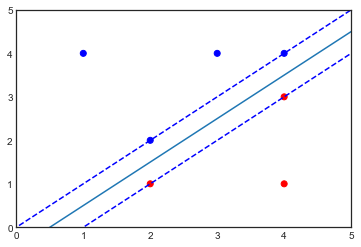

In [5]:
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
plt.plot(section, f(section))
plt.plot(section, f(section) + .5, 'b--')
plt.plot(section, f(section) - .5, 'b--')
plt.ylim(0, 5)
plt.xlim(0, 5);

Feature Expansion
- Enlarge the space of features by including transformations; e.g. $X_{1}^{2}, X_{1}^{3}, X_{1} X_{2}, X_{1} X_{2}^{2}, \ldots .$ Hence go from a
$p$-dimensional space to a $M>p$ dimensional space.
- Fit a support-vector classifier in the enlarged space.
- This results in non-linear decision boundaries in the original space.
Example: Suppose we use $\left(X_{1}, X_{2}, X_{1}^{2}, X_{2}^{2}, X_{1} X_{2}\right)$ instead of just $\left(X_{1}, X_{2}\right) .$ Then the decision boundary would be of the form
$$
\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}+\beta_{3} X_{1}^{2}+\beta_{4} X_{2}^{2}+\beta_{5} X_{1} X_{2}=0
$$
This leads to nonlinear decision boundaries in the original space (quadratic conic sections).

### Nonlinearities and Kernels
- Polynomials (especially high-dimensional ones) get wild
rather fast.
- There is a more elegant and controlled way to introduce
nonlinearities in support-vector classifiers | through the
use of kernels.
- Before we discuss these, we must understand the role of
inner products in support-vector classifiers.

### Inner products and support vectors
$$
\left\langle x_{i}, x_{i^{\prime}}\right\rangle=\sum_{j=1}^{p} x_{i j} x_{i^{\prime} j} \quad \text { - inner product between vectors }
$$
The linear support vector classifier can be represented as
$$
f(x)=\beta_{0}+\sum_{i=1}^{n} \alpha_{i}\left\langle x, x_{i}\right\rangle \quad-n \text { parameters }
$$
- To estimate the parameters $\alpha_{1}, \ldots, \alpha_{n}$ and $\beta_{0},$ all we need are the $\left(\begin{array}{l}n \\ 2\end{array}\right)$ inner products $\left\langle x_{i}, x_{i^{\prime}}\right\rangle$ between all pairs of training observations. It turns out that most of the $\hat{\alpha}_{i}$ can be zero:
$$
f(x)=\beta_{0}+\sum_{i \in \mathcal{S}} \hat{\alpha}_{i}\left\langle x, x_{i}\right\rangle
$$
$\mathcal{S}$ is the support set of indices $i$ such that $\hat{\alpha}_{i}>0 $

### Kernels and Support Vector Machines
If we can compute inner-products between observations, we can fit a SV classifier. Can be quite abstract! Some special kernel functions can do this for us. E.g.
$$
K\left(x_{i}, x_{i^{\prime}}\right)=\left(1+\sum_{j=1}^{p} x_{i j} x_{i^{\prime} j}\right)^{d}
$$
computes the inner-products needed for $d$ dimensional polynomials $\left(\begin{array}{c}p+d \\ d\end{array}\right)$ basis functions!
Try it for $p=2$ and $d=2$
\bullet The solution has the form
$$
f(x)=\beta_{0}+\sum_{i \in \mathcal{S}} \hat{\alpha}_{i} K\left(x, x_{i}\right)
$$

In [6]:
# Example Heart Data
df_heart = pd.read_csv('data/heart.csv', index_col=0).dropna()
for cat_col in ['ChestPain', 'Thal', 'AHD']:
    df_heart[cat_col] = df_heart[cat_col].astype('category')
    print(f'{cat_col}: {df_heart[cat_col].cat.categories.values}')
df_heart.head(3)

ChestPain: ['asymptomatic' 'nonanginal' 'nontypical' 'typical']
Thal: ['fixed' 'normal' 'reversable']
AHD: ['No' 'Yes']


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [7]:
X = pd.get_dummies(df_heart.drop(['AHD'], axis=1), drop_first=True)
y = df_heart.AHD.map({'Yes': 1, 'No': 0})
X.head(3)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0
3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1


In [8]:
y.head()

1    0
2    1
3    1
4    0
5    0
Name: AHD, dtype: category
Categories (2, int64): [0, 1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=90)

In [10]:
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_LDA = lda.predict_proba(X_test)[:,1]
*roc_LDA, _ = roc_curve(y_test, y_pred_LDA)
roc_auc_LDA = auc(*roc_LDA);

# SVC
svc = make_pipeline(StandardScaler(), LinearSVC())
svc.fit(X_train, y_train)
y_pred_SVC = svc.decision_function(X_test)
*roc_SVC, _ = roc_curve(y_test, y_pred_SVC)
roc_auc_SVC = auc(*roc_SVC);

# SVM
gammas = [1e-3, 1e-2, 1e-1]
roc_SVMs = []
roc_auc_SVMs = []
for gamma in gammas:
    svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=gamma))
    svm.fit(X_train, y_train)
    y_pred_SVM = svm.decision_function(X_test)
    *roc_SVM, _ = roc_curve(y_test, y_pred_SVM)
    roc_auc_SVM = auc(*roc_SVM)
    
    roc_SVMs.append(roc_SVM)
    roc_auc_SVMs.append(roc_auc_SVM)

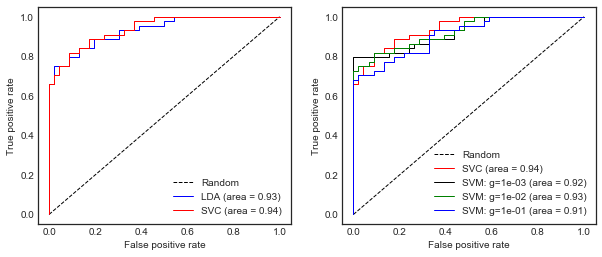

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

# LDA vs SVC
ax1.plot(np.linspace(0, 1.0, 100), np.linspace(0, 1.0, 100), color='black', linestyle='--', lw=1, label='Random')
ax1.plot(*roc_LDA, color='blue', lw=1, label=f'LDA (area = {roc_auc_LDA:0.2f})')
ax1.plot(*roc_SVC, color='red', lw=1, label=f'SVC (area = {roc_auc_SVC:0.2f})')
ax1.legend();

# SVC vs SVM
ax2.plot(np.linspace(0, 1.0, 100), np.linspace(0, 1.0, 100), color='black', linestyle='--', lw=1, label='Random')
ax2.plot(*roc_SVC, color='red', lw=1, label=f'SVC (area = {roc_auc_SVC:0.2f})')
for i, color in enumerate(['black', 'green', 'blue']):
    ax2.plot(*roc_SVMs[i], color=color, lw=1, label=f'SVM: g={gammas[i]:1.0e} (area = {roc_auc_SVMs[i]:0.2f})')
ax2.legend();

for ax in [ax1, ax2]:
    ax.set_ylabel('True positive rate')
    ax.set_xlabel('False positive rate')

ROC curve is obtained by changing the threshold 0 to threshold
t in f(X) > t, and recording false positive and true positive
rates as t varies. Here we see ROC curves on training data.

### SVMs: more than 2 classes?
- The SVM as defined works for $K=2$ classes. What do we do if we have $K>2$ classes? 
- OVA One versus All. Fit $K$ different 2-class SVM classifiers $\hat{f}_{k}(x), k=1, \ldots, K ;$ each class versus the rest. Classify $x^{*}$ to the class for which $\hat{f}_{k}\left(x^{*}\right)$ is largest. 
- OVO One versus One. Fit all $\left(\begin{array}{l}K \\ 2\end{array}\right)$ pairwise classifiers $\hat{f}_{k \ell}(x) .$ Classify $x^{*}$ to the class that wins the most pairwise competitions. 
- Which to choose? 
If $K$ is not too large, use OVO.

### Support Vector versus Logistic Regression? 

With $f(X)=\beta_{0}+\beta_{1} X_{1}+\ldots+\beta_{p} X_{p}$ can rephrase
support-vector classifier optimization as
$$
\underset{\beta_{0}, \beta_{1}, \ldots, \beta_{p}}{\operatorname{minimize}}\left\{\sum_{i=1}^{n} \max \left[0,1-y_{i} f\left(x_{i}\right)\right]+\lambda \sum_{j=1}^{p} \beta_{j}^{2}\right\}
$$

- This has the form
loss plus penalty.
- The loss is known as the
hinge loss.
- Very similar to "loss" in
logistic regression (negative
log-likelihood).

### Which to use: SVM or Logistic Regression
- When classes are (nearly) separable, SVM does better than
LR. So does LDA.
- When not, LR (with ridge penalty) and SVM very similar.
- If you wish to estimate probabilities, LR is the choice.
- For nonlinear boundaries, kernel SVMs are popular. Can
use kernels with LR and LDA as well, but computations
are more expensive.

### Exercises

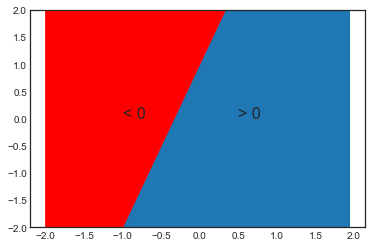

In [12]:
#1
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 + 3*x
plt.fill_between(section, f(section), y2=-2)
plt.fill_between(section, f(section), y2=2, color='r')
plt.text(.5, 0, "> 0", fontsize=16)
plt.text(-1, 0, "< 0", fontsize=16)
plt.ylim(-2, 2);

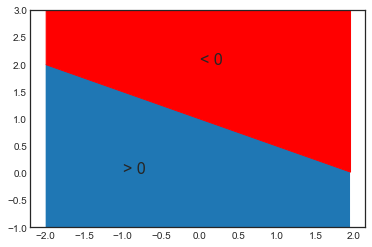

In [13]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 - .5*x
plt.fill_between(section, f(section), y2=-1)
plt.fill_between(section, f(section), y2=3, color='r')
plt.text(0, 2, "< 0", fontsize=16)
plt.text(-1, 0, "> 0", fontsize=16)
plt.ylim(-1, 3);

(-1, 5)

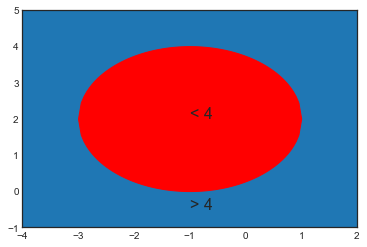

In [14]:
#2
section = np.arange(-3, 1.05, 1/20.)
f = lambda x: 2 + np.sqrt(4 - (1 + x)**2)
g = lambda x: 2 - np.sqrt(4 - (1 + x)**2)
plt.fill_between(np.arange(-5, 5), -10, 10)
plt.fill_between(section, g(section), f(section), color='r')
plt.text(-1, 2, "< 4", fontsize=16)
plt.text(-1, -.5, "> 4", fontsize=16)
plt.xlim(-4, 2)
plt.ylim(-1, 5)

c)
(0, 0) = blue
(-1, 1) = red
(2, 2) = blue
(3, 8) = blue

d) x1, x2, x1^2 and x^2 are linear in 4 dimensions. When it is projected down to 2 dimensions we get a circle.

In [15]:
#3 Same as the "SVC" section

d) Classification rule if x1 - x2 - .5 > 0 then red else blue

In [16]:
# e) margin is distance from support vector to line.
print("margin is", .5 / np.sqrt(2))

margin is 0.35355339059327373


f) point (4, 1) is far from the hyperplane and changing it slightly will have no effect on it.

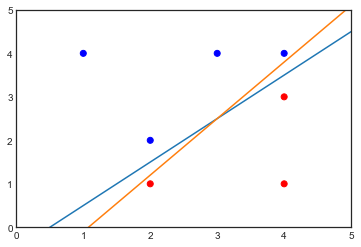

In [17]:
#g Green line is non-optimal hyperplane. Still separates data but worse margin
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
g = lambda x: 1.3 * x - 1.4
plt.plot(section, f(section))
plt.plot(section, g(section))
plt.ylim(0, 5)
plt.xlim(0, 5);

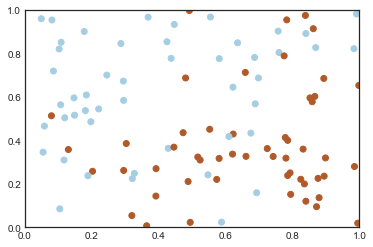

In [18]:
#4
# create fake data where true boundary is x2 - x1 = 0
X = np.random.rand(100, 2)
d = 3 * (X[:, 0] - X[:, 1])
n = np.random.randn(100)
y = np.where(n > d, 0, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1);

In [19]:
clf = SVC(kernel='linear', C=10)
clf.fit(X, y)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
clf.intercept_, clf.coef_

(array([0.15835985]), array([[ 3.20248419, -3.42976993]]))

(0, 1)

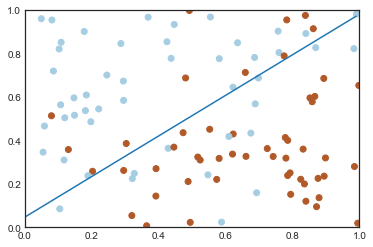

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
section = np.arange(0, 1, .01)

beta0 = clf.intercept_
beta1 = clf.coef_[0, 0]
beta2 = clf.coef_[0, 1]

f = lambda x: (beta0 + beta1 * x) / -beta2
plt.plot(section, f(section))
plt.xlim(0, 1)
plt.ylim(0, 1)

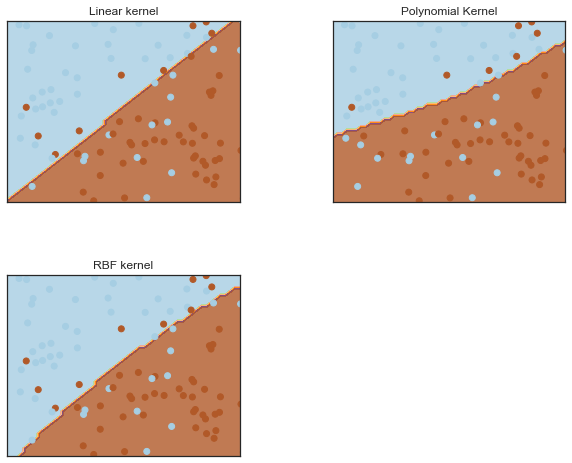

In [22]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(0, 1, h),
                     np.arange(0, 1, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [23]:
#poly actually does worse. Might need some tuning
svc.score(X, y), rbf_svc.score(X, y), poly_svc.score(X, y)

(0.75, 0.77, 0.78)

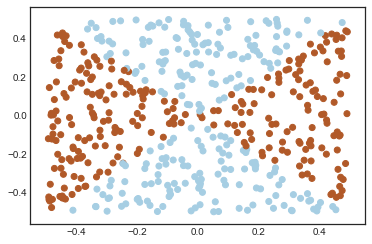

In [24]:
#5
X = np.random.rand(500,2) - .5
y = (X[:, 0] ** 2 - X[:, 1] ** 2 > 0) * 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

In [26]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

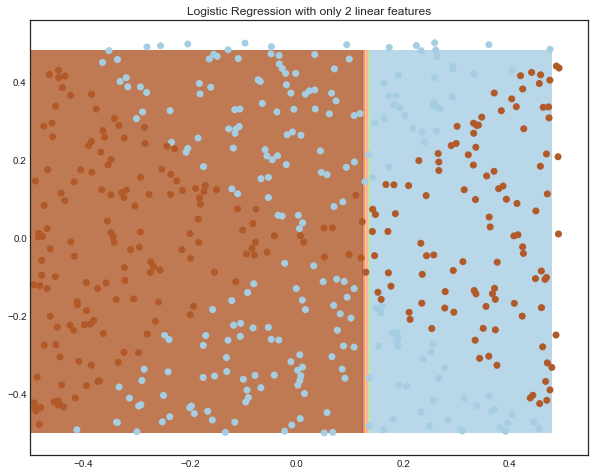

In [27]:
h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 2 linear features");

In [28]:
X_new = np.column_stack((X, X ** 2, X[:, 0] * X[:, 1]))
X_new.shape

(500, 5)

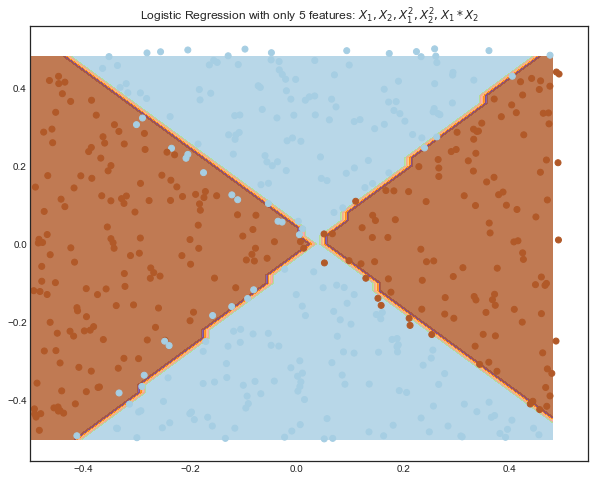

In [29]:
log_clf.fit(X_new, y)

h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))


plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 5 features: $X_1, X_2, X_1^2, X_2^2, X_1*X_2$");

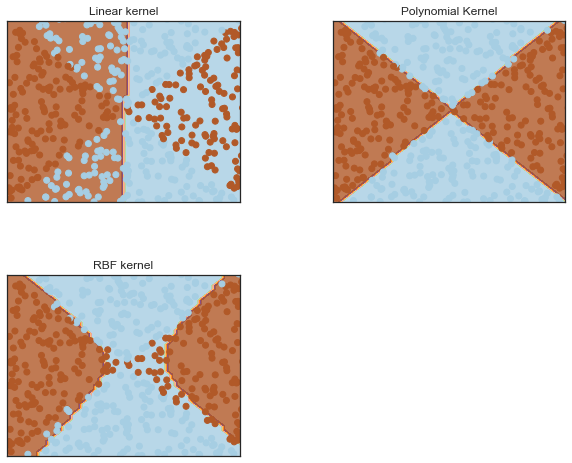

In [30]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=2, C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=.5, C=1).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

Linear Kernel fails here, must use polynomial or rbf

(0, 1)

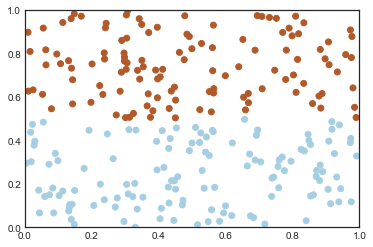

In [31]:
# 6
# Make a linear decision boundary at x2 > .5
X = np.random.rand(500, 2)
y = (X[:, 1] > .5) * 1

X_train = X[:250]
X_test = X[250:]
y_train = y[:250]
y_test = y[250:]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)

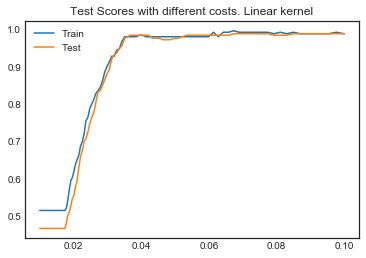

In [33]:
all_C = np.logspace(-2,-1, 100)
train_scores = []
test_scores = []
for c in all_C:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    train_scores.append(svc.score(X_train, y_train))
    test_scores.append(svc.score(X_test, y_test))
    
plt.plot(all_C, train_scores, label="Train")
plt.plot(all_C, test_scores, label="Test")
plt.title("Test Scores with different costs. Linear kernel")
plt.legend();

I don't think they worded this problem well. There needs to be a linearly separable data that has a wide enough decision boundary where points can be misclassified given new data.

In [34]:
#7
auto = pd.read_csv("data/auto.csv")
auto['y'] = (auto['mpg'] > auto['mpg'].median()) * 1
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,y
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [35]:
X = pd.concat((pd.get_dummies(auto[['cylinders', 'origin', 'year']].astype(object)), 
               auto[['displacement', 'horsepower', 'weight', 'acceleration']],), axis=1)
y = auto['y']
X.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,year_70,year_71,...,year_77,year_78,year_79,year_80,year_81,year_82,displacement,horsepower,weight,acceleration
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,307.0,130,3504,12.0
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,350.0,165,3693,11.5
2,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,318.0,150,3436,11.0
3,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,304.0,150,3433,12.0
4,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,302.0,140,3449,10.5


In [36]:
from sklearn.model_selection import cross_val_score
X_new = auto.iloc[:, 1:7]
for c in np.logspace(-4,1, 10):
    clf = SVC(kernel='linear', C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("Linear SVM with c={} has test accuracy of {}".format(round(c,4), round(scores.mean(), 3)))

Linear SVM with c=0.0001 has test accuracy of 0.898
Linear SVM with c=0.0004 has test accuracy of 0.905
Linear SVM with c=0.0013 has test accuracy of 0.9
Linear SVM with c=0.0046 has test accuracy of 0.88
Linear SVM with c=0.0167 has test accuracy of 0.878
Linear SVM with c=0.0599 has test accuracy of 0.873
Linear SVM with c=0.2154 has test accuracy of 0.87
Linear SVM with c=0.7743 has test accuracy of 0.86
Linear SVM with c=2.7826 has test accuracy of 0.87
Linear SVM with c=10.0 has test accuracy of 0.87


In [37]:
for c in np.logspace(-2,3, 10):
    gamma = .00001
    clf = SVC(kernel='rbf', gamma=gamma, C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("RBF SVM with c={} and gamma = {} has test accuracy of {}".format(round(c,4), gamma, round(scores.mean(), 3)))

RBF SVM with c=0.01 and gamma = 1e-05 has test accuracy of 0.822
RBF SVM with c=0.0359 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=0.1292 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=0.4642 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=1.6681 and gamma = 1e-05 has test accuracy of 0.885
RBF SVM with c=5.9948 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=21.5443 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=77.4264 and gamma = 1e-05 has test accuracy of 0.898
RBF SVM with c=278.2559 and gamma = 1e-05 has test accuracy of 0.898
RBF SVM with c=1000.0 and gamma = 1e-05 has test accuracy of 0.89


Polynomial kernel not able to be solved in reasonable time

### End of Chapter 9